<a href="https://colab.research.google.com/github/SzupanBurliga/DigitalSignalProcessing/blob/main/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zad 1 DTF sygnału harmonicznego

1 Rekonstrukcja sygnału z błędem: 8.538949459927611e-12
2 Rekonstrukcja sygnału z błędem: 8.540020264605375e-14
Różnica w rekonstrukcjach sygnału: 0.010001254023908666


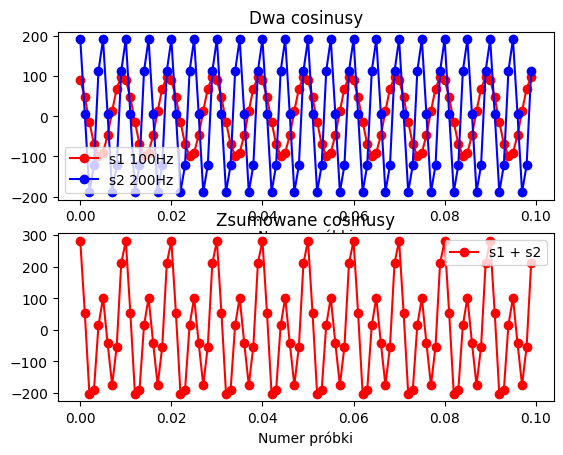

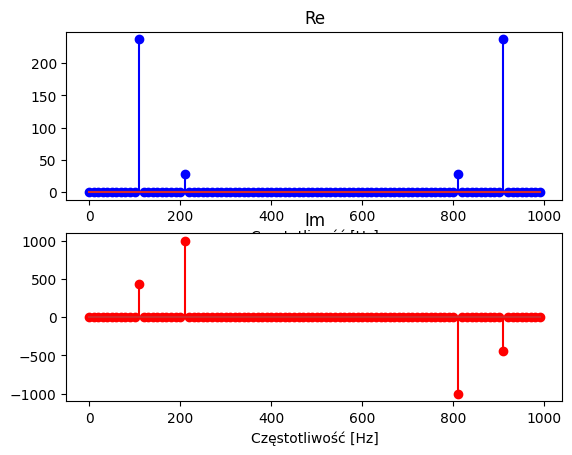

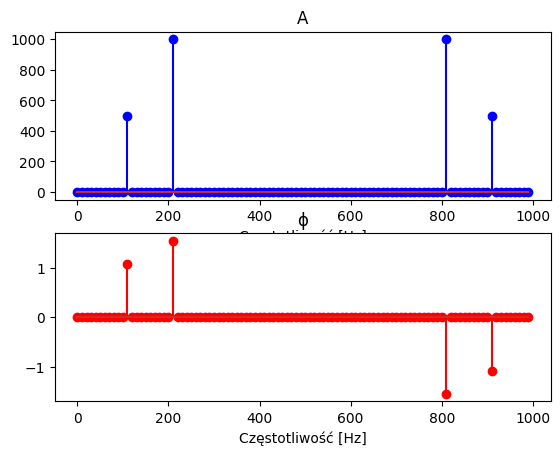

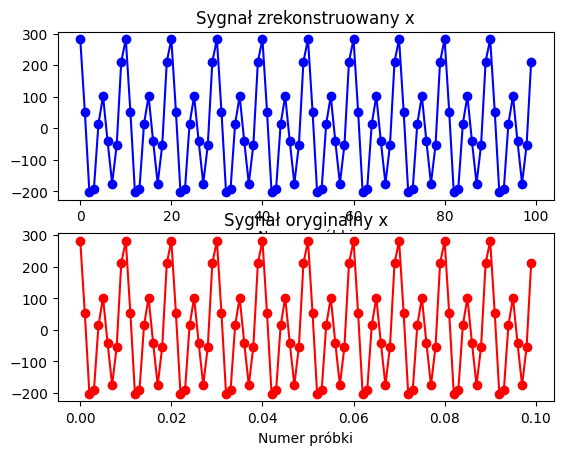

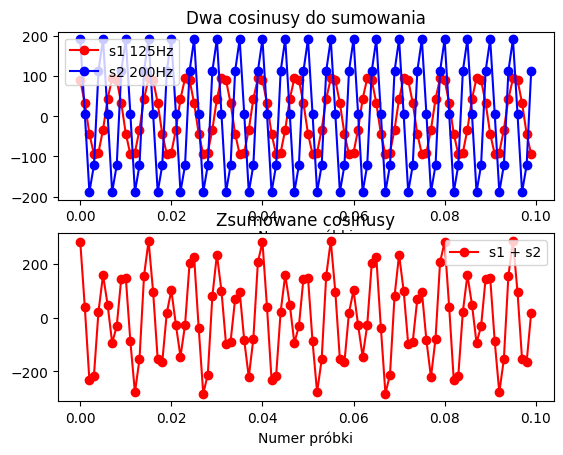

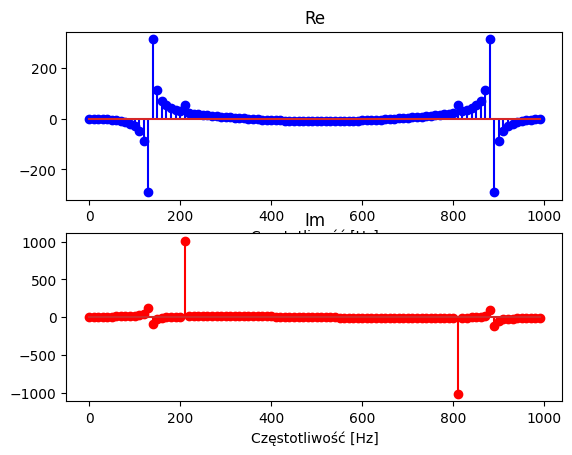

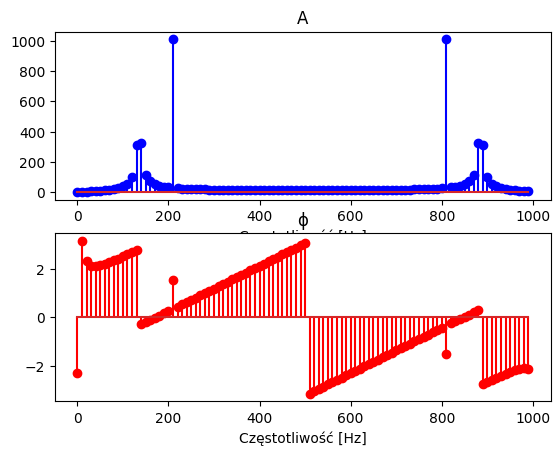

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Dane
N = 100    # liczba próbek
fs = 1000  # częstotliwość próbkowania
st = 1/fs  # krok próbkowania
T = 0.1    # czas trwania próbkowania (100 próbek dla 1000Hz = 0.1s)

sample = np.arange(0, T, st)  # przedział czasowy próbkowania

# Częstotliwości
f1 = 100
f2 = 200

# Amplitudy
A1 = 100
A2 = 200

# Kąty fazowe
p1 = (np.pi/7)
p2 = (np.pi/11)

# Tworzenie sygnału z sumy sinusów
s1 = lambda t: A1 * np.cos(2*np.pi*f1*t + p1)
s2 = lambda t: A2 * np.cos(2*np.pi*f2*t + p2)

# Sygnał x z sumy sinusów
x = s1(sample) + s2(sample)

plt.figure(2)
plt.subplot(2,1,1)
plt.plot(sample, s1(sample), 'r-o', label='s1 100Hz')
plt.plot(sample, s2(sample), 'b-o', label='s2 200Hz')
plt.title('Dwa cosinusy')
plt.legend()
plt.xlabel('Numer próbki')

plt.subplot(2,1,2)
plt.plot(sample, x, 'r-o', label='s1 + s2')
plt.title('Zsumowane cosinusy')
plt.legend()
plt.xlabel('Numer próbki')

# Generowanie macierzy A - macierzy transformacji DFT
W = np.exp(1j*2*np.pi/N)

A = np.zeros((N, N), dtype=np.complex128)
for k in range(N):
    for n in range(N):
        A[k, n] = (1/np.sqrt(N)) * (W ** (-(k-1)*(n-1)))

# Dyskretna transformata Fouriera - DFT
X = np.dot(A, x)

# Rysowanie widma y sygnału x
XRe = np.real(X)   # część rzeczywista
XIm = np.imag(X)   # część urojona
XA  = np.abs(X)    # moduł
XP  = np.angle(X) * (np.abs(X) > 1)  # faza

# Skalowanie osi częstotliwości w Herzach
f = np.arange(N) * fs / N

plt.figure(3)
plt.subplot(2,1,1)
plt.stem(f, XRe, 'b-o')
plt.title('Re')
plt.xlabel('Częstotliwość [Hz]')

plt.subplot(2,1,2)
plt.stem(f, XIm, 'r-o')
plt.title('Im')
plt.xlabel('Częstotliwość [Hz]')

plt.figure(4)
plt.subplot(2,1,1)
plt.stem(f, XA, 'b-o')
plt.title('A')
plt.xlabel('Częstotliwość [Hz]')

plt.subplot(2,1,2)
plt.stem(f, XP, 'r-o')
plt.title('ϕ')
plt.xlabel('Częstotliwość [Hz]')

# Wyznaczanie B - macierzy rekonstrukcji macierzy A
B = np.conj(A).T
xrcnst = np.dot(B, X)

plt.figure(5)
plt.subplot(2,1,1)
plt.plot(np.real(xrcnst), 'b-o')
plt.title('Sygnał zrekonstruowany x')
plt.xlabel('Numer próbki')

plt.subplot(2,1,2)
plt.plot(sample, x, 'r-o')
plt.title('Sygnał oryginalny x')
plt.xlabel('Numer próbki')

# Sprawdzenie czy transformata posiada
# właściwość perfekcyjnej rekonstrukcji
tol1 = np.max(np.abs(x - xrcnst))
print('1 Rekonstrukcja sygnału z błędem:', tol1)

# Zastąpienie operacji X = Ax przez X = fft(x)
# Zastąpienie operacji Xrcnst = BX przez Xrcnst = ifft(X)
X = np.fft.fft(x)
xrcnst = np.fft.ifft(X)

# Sprawdzenie czy transformata posiada
# właściwość perfekcyjnej rekonstrukcji
tol2 = np.max(np.abs(x - xrcnst))
print('2 Rekonstrukcja sygnału z błędem:', tol2)
print('Różnica w rekonstrukcjach sygnału:', tol2 / tol1)

# Zmiana f1 na 125Hz
f1 = 125
s1 = lambda t: A1 * np.cos(2*np.pi*f1*t + p1)
x = s1(sample) + s2(sample)

plt.figure(6)
plt.subplot(2,1,1)
plt.plot(sample, s1(sample), 'r-o', label='s1 125Hz')
plt.plot(sample, s2(sample), 'b-o', label='s2 200Hz')
plt.title('Dwa cosinusy do sumowania')
plt.legend()
plt.xlabel('Numer próbki')

plt.subplot(2,1,2)
plt.plot(sample, x, 'r-o', label='s1 + s2')
plt.title('Zsumowane cosinusy')
plt.legend()
plt.xlabel('Numer próbki')

# Dyskretna transformata Fouriera - DFT
X = np.dot(A, x)

# Rysowanie widma y sygnału x
XRe = np.real(X)   # część rzeczywista
XIm = np.imag(X)   # część urojona
XA  = np.abs(X)    # moduł
XP  = np.angle(X)  # faza

# Skalowanie osi częstotliwości w Herzach
f = np.arange(N) * fs / N

plt.figure(7)
plt.subplot(2,1,1)
plt.stem(f, XRe, 'b-o')
plt.title('Re')
plt.xlabel('Częstotliwość [Hz]')

plt.subplot(2,1,2)
plt.stem(f, XIm, 'r-o')
plt.title('Im')
plt.xlabel('Częstotliwość [Hz]')

plt.figure(8)
plt.subplot(2,1,1)
plt.stem(f, XA, 'b-o')
plt.title('A')
plt.xlabel('Częstotliwość [Hz]')

plt.subplot(2,1,2)
plt.stem(f, XP, 'r-o')
plt.title('ϕ')
plt.xlabel('Częstotliwość [Hz]')

plt.show()

Zad 2 DTfT

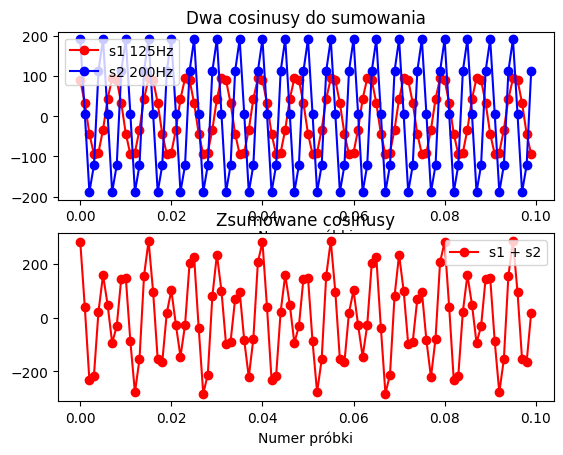

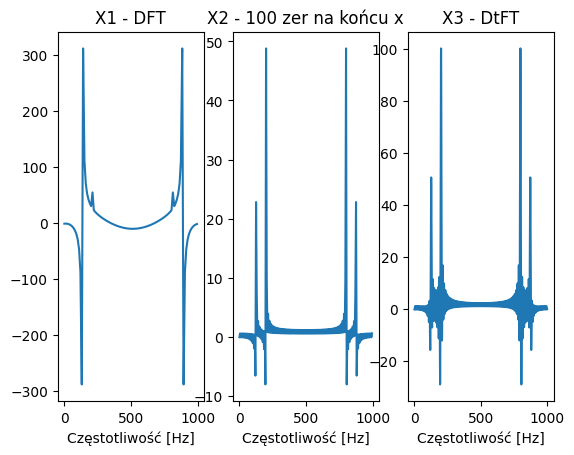

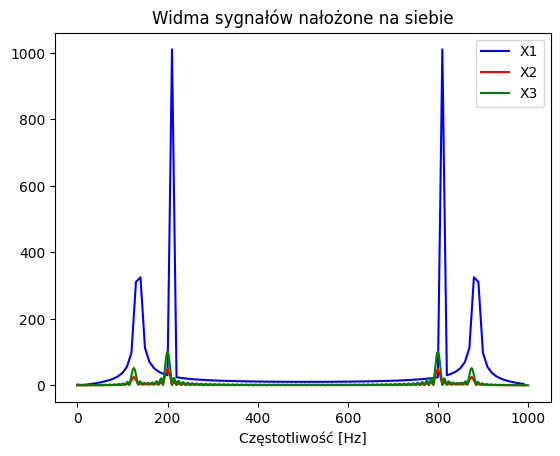

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Dane
N = 100    # liczba próbek
fs = 1000  # częstotliwość próbkowania
ds = 1/fs  # krok próbkowania
T = 0.1    # czas trwania próbkowania (100 próbek dla 1000Hz = 0.1s)

sample = np.arange(0, T, ds)  # przedział czasowy próbkowania

# Częstotliwości
f1 = 125
f2 = 200

# Amplitudy
A1 = 100
A2 = 200

# Kąty fazowe
p1 = (np.pi/7)
p2 = (np.pi/11)

# Tworzenie sygnału z sumy sinusów
s1 = lambda t: A1 * np.cos(2*np.pi*f1*t + p1)
s2 = lambda t: A2 * np.cos(2*np.pi*f2*t + p2)

# Sygnał x z sumy sinusów
x = s1(sample) + s2(sample)

plt.figure(2)
plt.subplot(2,1,1)
plt.plot(sample, s1(sample), 'r-o', label='s1 125Hz')
plt.plot(sample, s2(sample), 'b-o', label='s2 200Hz')
plt.title('Dwa cosinusy do sumowania')
plt.legend()
plt.xlabel('Numer próbki')

plt.subplot(2,1,2)
plt.plot(sample, x, 'r-o', label='s1 + s2')
plt.title('Zsumowane cosinusy')
plt.legend()
plt.xlabel('Numer próbki')

# Generowanie macierzy A - macierzy transformacji DFT
W = np.exp(1j*2*np.pi/N)

A = np.zeros((N, N), dtype=np.complex128)
for k in range(N):
    for n in range(N):
        A[k, n] = (1/np.sqrt(N)) * (W ** (-(k-1)*(n-1)))

# Dyskretna transformata Fouriera - DFT - otrzymujemy X1
X1 = np.dot(A, x)

# Zwiększ rozdzielczości częstotliwości poprzez
# dołączenie 100 zer na końcu sygnału x, otrzymujemy xz
M = 100
xz = np.concatenate((x, np.zeros(M)))

# DFT xz podstawie wzoru - otrzymujemy X2
X2 = np.fft.fft(xz) / (N+M)

# DtFT x na podstawie wzoru - otrzymujemy X3
df = 0.25
f = np.arange(0, 1001, df)

X3 = np.zeros(len(f), dtype=np.complex128)
for q in range(len(f)):
    for n in range(N):
        X3[q] += x[n] * np.exp(-1j*2*np.pi*f[q]*n/fs)
X3 /= N

# Skalowanie osi częstotliwości w Herzach
fx1 = np.arange(N) * fs / N
fx2 = np.arange(N+M) * fs / (N+M)
fx3 = f

plt.figure(3)
plt.subplot(1,3,1)
plt.plot(fx1, np.real(X1))
plt.title('X1 - DFT')
plt.xlabel('Częstotliwość [Hz]')

plt.subplot(1,3,2)
plt.plot(fx2, np.real(X2))
plt.title('X2 - 100 zer na końcu x')
plt.xlabel('Częstotliwość [Hz]')

plt.subplot(1,3,3)
plt.plot(fx3, np.real(X3))
plt.title('X3 - DtFT')
plt.xlabel('Częstotliwość [Hz]')

plt.figure(4)
plt.plot(fx1, np.abs(X1), 'b', label='X1')
plt.plot(fx2, np.abs(X2), 'r', label='X2')
plt.plot(fx3, np.abs(X3), 'g', label='X3')
plt.legend()
plt.title('Widma sygnałów nałożone na siebie')
plt.xlabel('Częstotliwość [Hz]')

plt.show()


Zad 3  DtFT, rola funkcji okien i liczby próbek

<ipython-input-7-b1a648db07b4>:103: DeprecationWarning: Importing chebwin from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.chebwin' or the convenience function 'scipy.signal.get_window' instead.
  xche = chebwin(N, 100) * x
<ipython-input-7-b1a648db07b4>:106: DeprecationWarning: Importing chebwin from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.chebwin' or the convenience function 'scipy.signal.get_window' instead.
  xche2 = chebwin(N, 200) * x


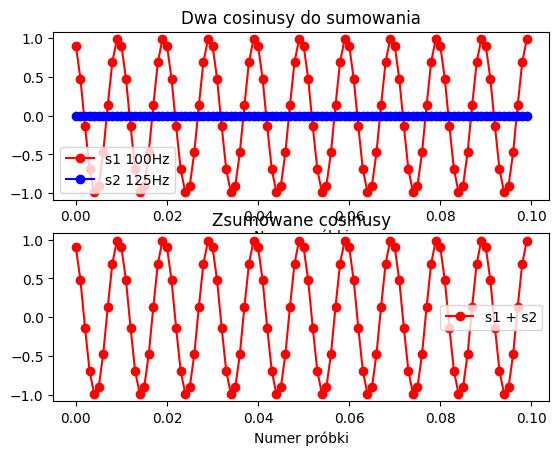

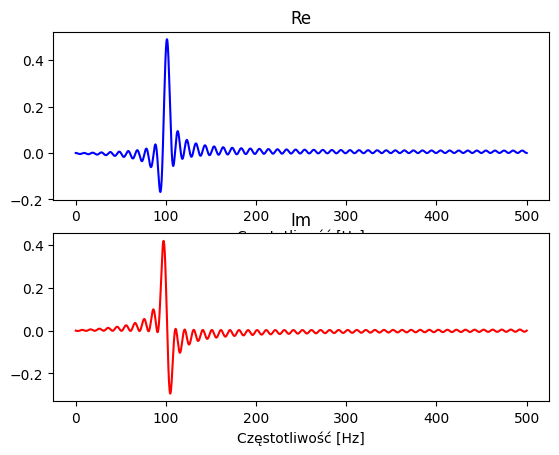

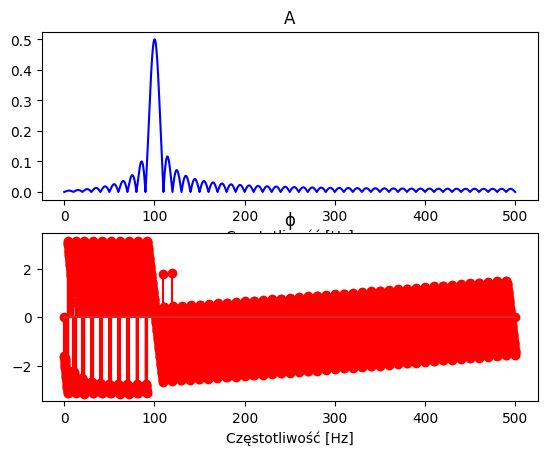

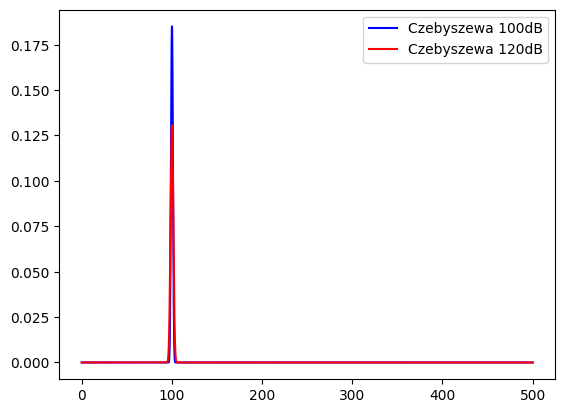

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chebwin

# Dane
N = 100    # liczba próbek
fs = 1000  # częstotliwość próbkowania
st = 1/fs  # krok próbkowania
T = 0.1    # czas trwania próbkowania (100 próbek dla 1000Hz = 0.1s)

sample = np.arange(0, T, st)  # przedział czasowy próbkowania

# Częstotliwości
f1 = 100
f2 = 125

# Amplitudy
A1 = 1
A2 = 0.0001

# Kąty fazowe
p1 = (np.pi/7)
p2 = (np.pi/11)

# Tworzenie sygnału z sumy sinusów
s1 = lambda t: A1 * np.cos(2*np.pi*f1*t + p1)
s2 = lambda t: A2 * np.cos(2*np.pi*f2*t + p2)

# Sygnał x z sumy sinusów
x = s1(sample) + s2(sample)

plt.figure(2)
plt.subplot(2,1,1)
plt.plot(sample, s1(sample), 'r-o', label='s1 100Hz')
plt.plot(sample, s2(sample), 'b-o', label='s2 125Hz')
plt.title('Dwa cosinusy do sumowania')
plt.legend()
plt.xlabel('Numer próbki')

plt.subplot(2,1,2)
plt.plot(sample, x, 'r-o', label='s1 + s2')
plt.title('Zsumowane cosinusy')
plt.legend()
plt.xlabel('Numer próbki')

# Obliczanie DtFT
f = np.arange(0, 500.1, 0.1)
X = np.zeros(len(f), dtype=np.complex128)

for fi in range(len(f)):
    for n in range(N):
        X[fi] += x[n] * np.exp(-1j*2*np.pi*f[fi]*n/fs)
X /= N

# Rysowanie widma y sygnału x
XRe = np.real(X)   # część rzeczywista
XIm = np.imag(X)   # część urojona
XA  = np.abs(X)    # moduł
XP  = np.angle(X)  # faza

plt.figure(4)
plt.subplot(2,1,1)
plt.plot(f, XRe, 'b-')
plt.title('Re')
plt.xlabel('Częstotliwość [Hz]')

plt.subplot(2,1,2)
plt.plot(f, XIm, 'r-')
plt.title('Im')
plt.xlabel('Częstotliwość [Hz]')

plt.figure(5)
plt.subplot(2,1,1)
plt.plot(f, XA, 'b-')
plt.title('A')
plt.xlabel('Częstotliwość [Hz]')

plt.subplot(2,1,2)
plt.stem(f, XP, 'r-')
plt.title('ϕ')
plt.xlabel('Częstotliwość [Hz]')

# Zmiana liczby próbek na 1000 i powtórzenie ćwiczenia dla okna Czebyszewa

# Dane
N = 1000    # liczba próbek
T = 1    # czas trwania probkowania (100 probek dla 1000Hz = 0.1s)

sample = np.arange(0, T, st) # przedział czasowy próbkowania

# Tworzenie sygnału z sumy sinusów
x = s1(sample) + s2(sample)

# Obliczanie DtFT
f = np.arange(0, 500.1, 0.1)
X = np.zeros(len(f), dtype=np.complex128)

for fi in range(len(f)):
    for n in range(N):
        X[fi] += x[n] * np.exp(-1j*2*np.pi*f[fi]*n/fs)
X /= N

xche = chebwin(N, 100) * x
Xche = np.zeros(len(f), dtype=np.complex128)

xche2 = chebwin(N, 200) * x
Xche2 = np.zeros(len(f), dtype=np.complex128)

for fre in range(len(f)):
    for j in range(N):
        Xche[fre] += 1/N * xche[j] * np.exp(-1j*2*np.pi*f[fre]/fs*j)
        Xche2[fre] += 1/N * xche2[j] * np.exp(-1j*2*np.pi*f[fre]/fs*j)

plt.figure(6)
plt.plot(f, np.abs(Xche), "b-", label='Czebyszewa 100dB')
plt.plot(f, np.abs(Xche2), "r-", label='Czebyszewa 120dB')
plt.legend()

plt.show()



Zad 4

<ipython-input-14-d1eb13a4ec2c>:39: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.arange(1, 513), 20*np.log10(np.abs(X)))


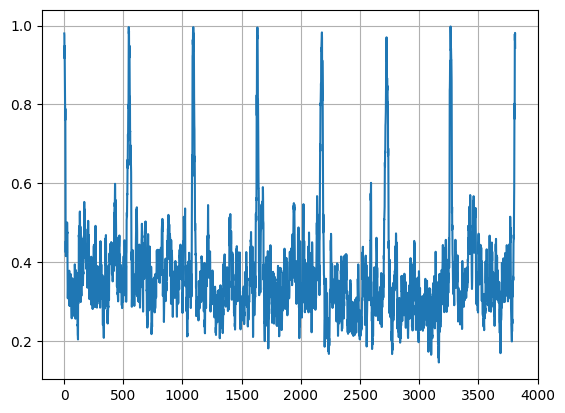

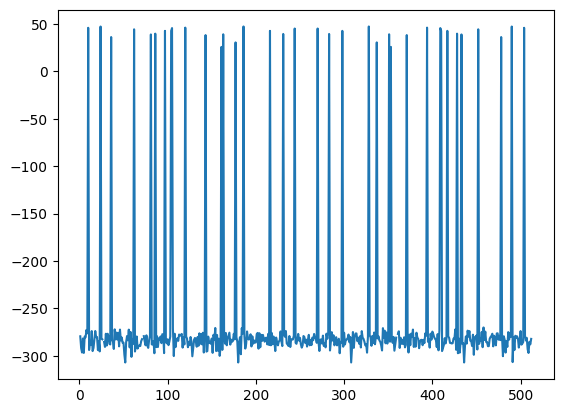

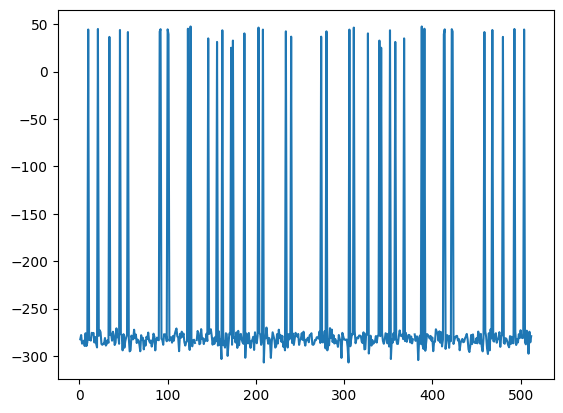

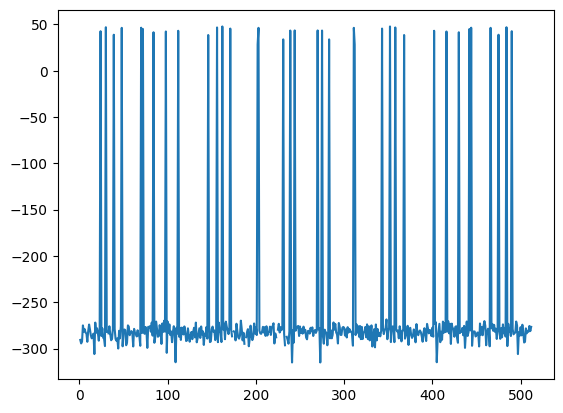

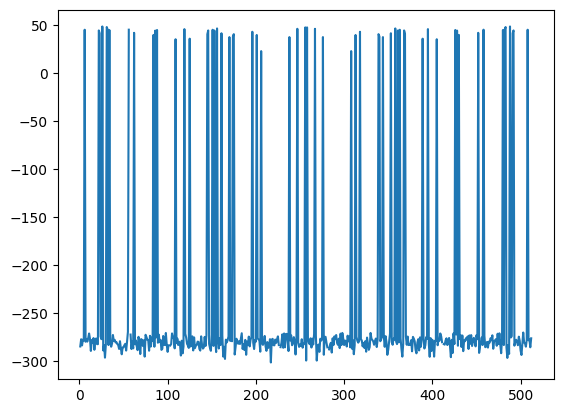

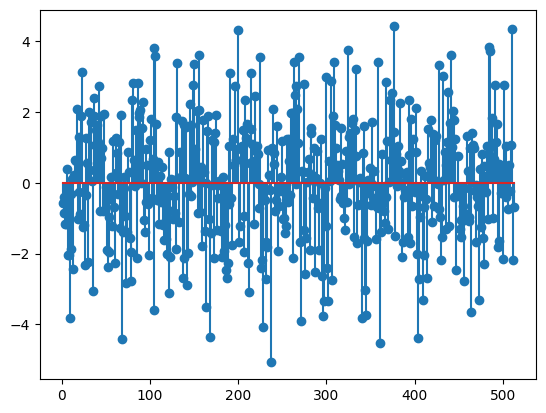

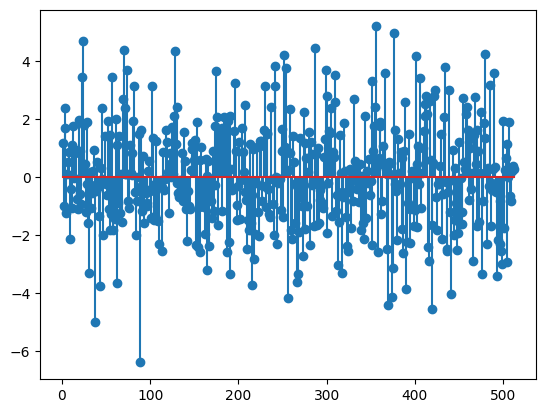

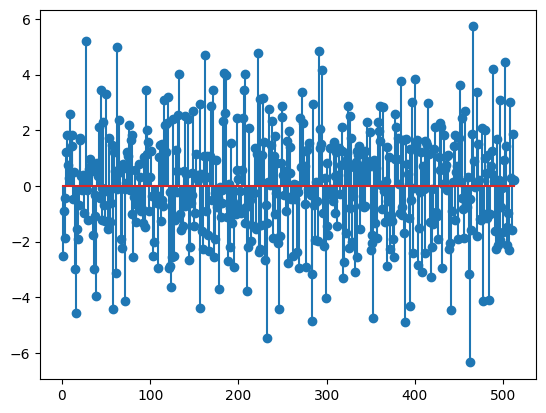

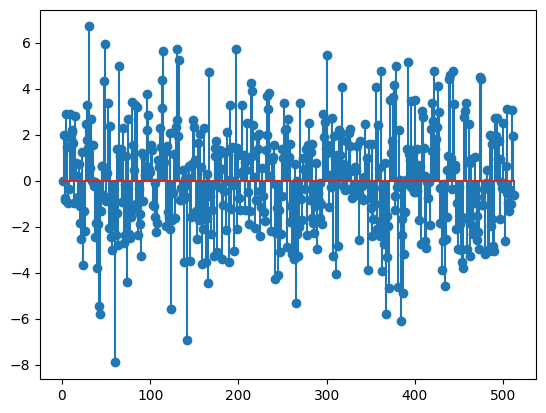

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Wczytanie danych z pliku .mat
data = loadmat('lab_03.mat')
x = data['x_9'].flatten()

# Indeks modulo
index = 407676
modulo = (index % 16) + 1

# Wyszukiwanie ramek
ramki = 0
kor = np.zeros(4353 - 511 - 31)

for i in range(4353 - 511 - 31):
    prefix = x[i:i+32]
    dane = x[i+511:i+543]
    if len(dane) > 0:
        kor[i] = np.max(np.abs(np.correlate(prefix, dane, mode='same'))) / np.sqrt(np.sum(np.abs(prefix)**2) * np.sum(np.abs(dane)**2))
        if kor[i] >= 0.99:
            ramki += 1
            if ramki == 1:
                r = x[i:i+512]
            else:
                r = np.vstack((r, x[i:i+512]))

# Wykres korelacji
plt.figure(2)
t = np.arange(1, len(kor)+1)
plt.plot(t, kor)
plt.grid(True)

# Analiza częstotliwościowa ramek
for i in range(ramki):
    X = np.fft.fft(r[i, :])
    plt.figure(3)
    plt.plot(np.arange(1, 513), 20*np.log10(np.abs(X)))
    plt.show()

# Wykresy ramek
for i in range(ramki):
    plt.figure(4)
    plt.stem(np.arange(1, 513), r[i, :])
    plt.pause(0.1)
